In [27]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/mock_up.csv
/kaggle/input/dataset/test_up.csv
/kaggle/input/dataset/train_up.csv


In [28]:
# loading datasets
train = pd.read_csv("../input/dataset/train_up.csv")
test = pd.read_csv("../input/dataset/test_up.csv")

In [29]:
train.shape

(3112876, 29)

In [30]:
test.shape

(1334090, 28)

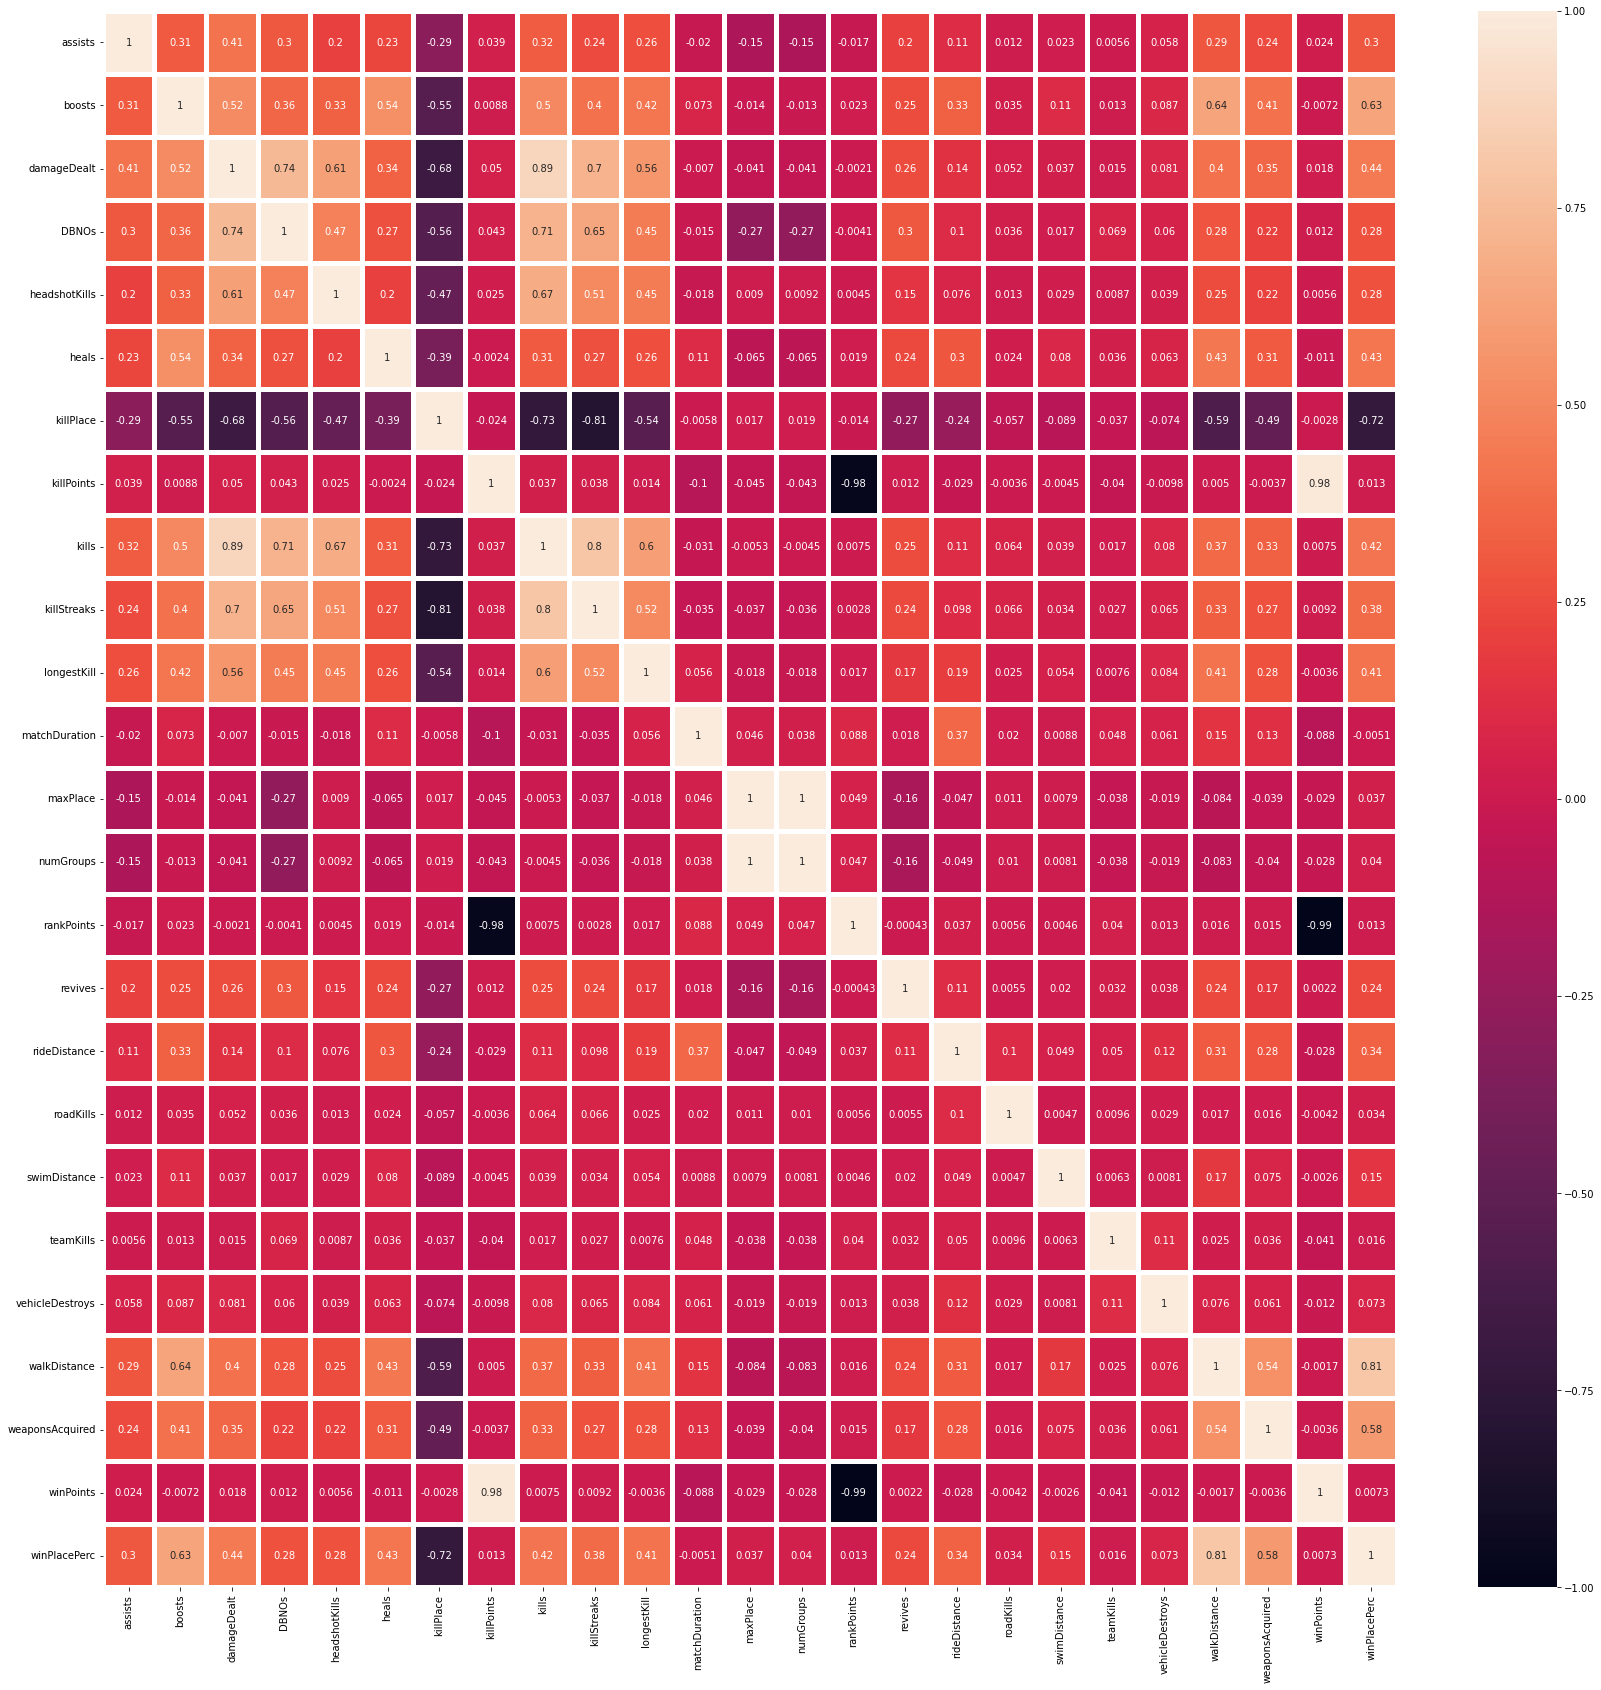

In [31]:
# Plotting heatmap for checking correlation of features
plt.figure(figsize=(29,29))
sns.heatmap(train.corr(),vmin=-1,linewidth=5, annot=True)
plt.show()

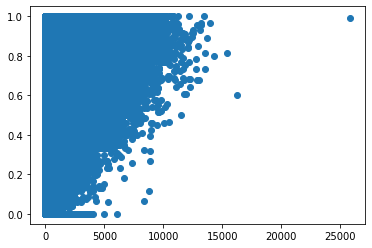

In [32]:
# Its clearly observed that walkDistance has the highest correlation with the target
plt.scatter(train['walkDistance'],train['winPlacePerc'])

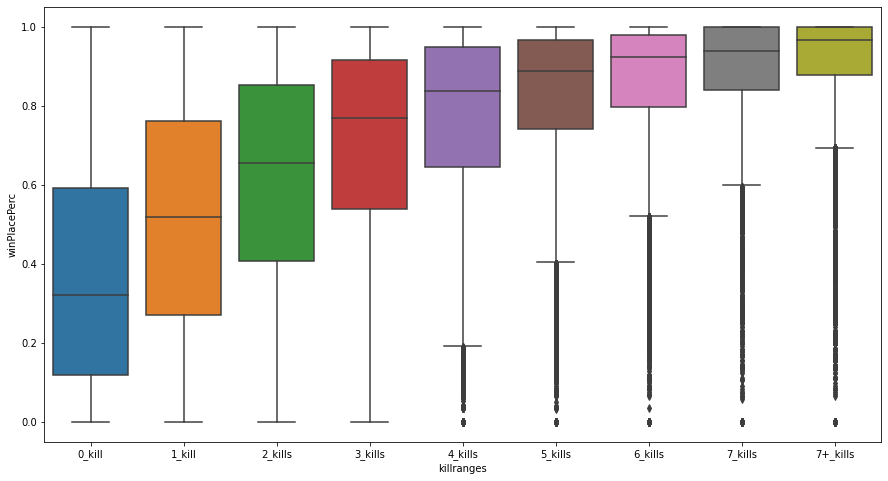

In [33]:
df_kills=train.copy()
df_kills['killranges']=pd.cut(df_kills['kills'], [-1,0,1,2,3,4,5,6,7,72], labels=['0_kill','1_kill','2_kills','3_kills','4_kills','5_kills','6_kills','7_kills','7+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x=df_kills['killranges'], y= train['winPlacePerc'])
plt.show()

In [34]:
# Checking the null value rows
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [35]:
#Dropping the null value row
train=train.dropna()

**REMOVING OUTLIERS**

In [36]:
train['kills'].value_counts()

0     1770162
1      650028
2      330469
3      163168
4       87305
5       46558
6       26541
7       15239
8        8938
9        5364
10       3258
11       2016
12       1218
13        785
14        534
15        333
16        224
17        159
18        105
20         86
19         69
21         51
22         49
23         35
24         30
26         17
27         14
25         13
28         12
29         10
31         10
30          9
33          8
36          6
38          6
34          4
35          4
32          4
39          4
37          3
41          3
53          3
40          3
46          2
42          2
55          2
57          2
43          2
66          1
44          1
56          1
72          1
50          1
65          1
49          1
47          1
Name: kills, dtype: int64

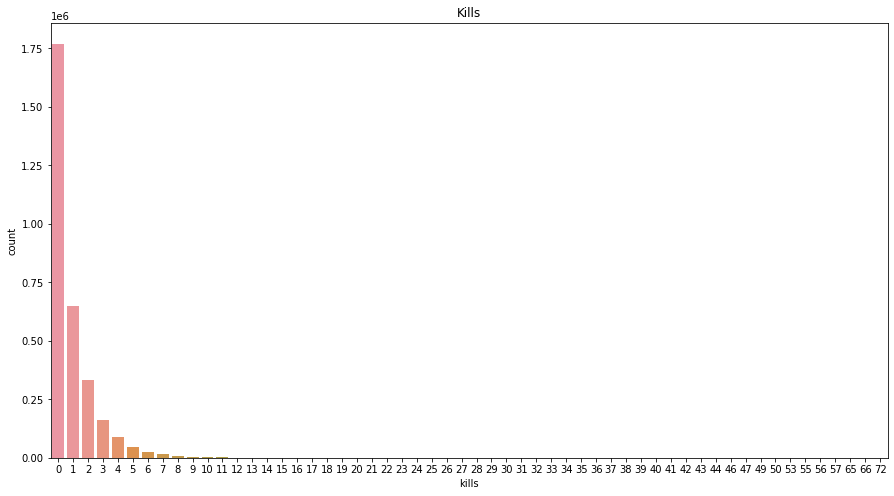

In [37]:
plt.subplots(figsize=(15,8))
sns.countplot(data=train,x=train['kills'])
plt.title('Kills')
plt.show()

In [38]:
train.drop(train[train['kills']>15].index,inplace=True)
train['kills'].value_counts()

0     1770162
1      650028
2      330469
3      163168
4       87305
5       46558
6       26541
7       15239
8        8938
9        5364
10       3258
11       2016
12       1218
13        785
14        534
15        333
Name: kills, dtype: int64

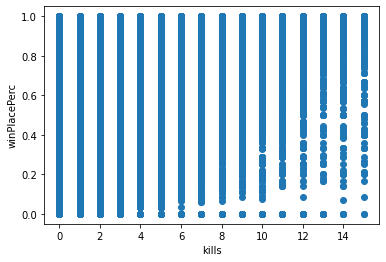

In [39]:
plt.xlabel("kills")
plt.ylabel("winPlacePerc")
plt.scatter(train['kills'],train['winPlacePerc'])


In [40]:
train['roadKills'].value_counts()

0     3102821
1        7865
2         916
3         210
4          48
5          26
6          14
7           5
8           5
10          2
9           2
11          1
14          1
Name: roadKills, dtype: int64

In [41]:
 train.drop(train[train['roadKills']>=4].index,inplace=True)
 train['roadKills'].value_counts()

0    3102821
1       7865
2        916
3        210
Name: roadKills, dtype: int64

In [42]:
train['boosts'].value_counts()

0     1763574
1      476150
2      343880
3      207537
4      137303
5       84025
6       48981
7       26282
8       13292
9        5958
10       2791
11       1135
12        511
13        200
14         91
15         48
16         20
18         12
17         11
21          3
19          2
22          1
20          1
24          1
33          1
28          1
23          1
Name: boosts, dtype: int64

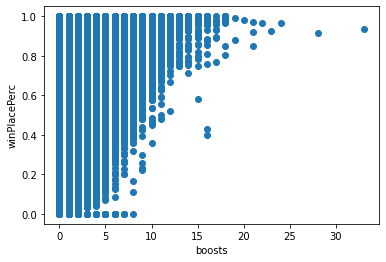

In [43]:
plt.xlabel("boosts")
plt.ylabel("winPlacePerc")
plt.scatter(train['boosts'],train['winPlacePerc'])

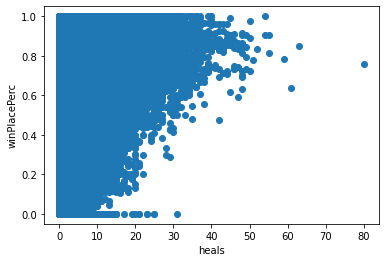

In [44]:
plt.xlabel("heals")
plt.ylabel("winPlacePerc")
plt.scatter(train['heals'],train['winPlacePerc'])

In [45]:
#adding new feature
train['medicKits']=train['heals']+train['boosts']
test['medicKits']=test['heals']+test['boosts']

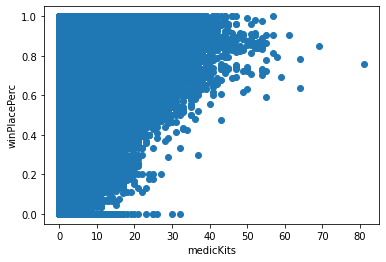

In [46]:
plt.xlabel("medicKits")
plt.ylabel("winPlacePerc")
plt.scatter(train['medicKits'],train['winPlacePerc'])

In [47]:
train['medicKits'].value_counts()

0     1545567
1      307929
2      264620
3      187267
4      149523
       ...   
61          1
81          1
69          1
58          1
59          1
Name: medicKits, Length: 63, dtype: int64

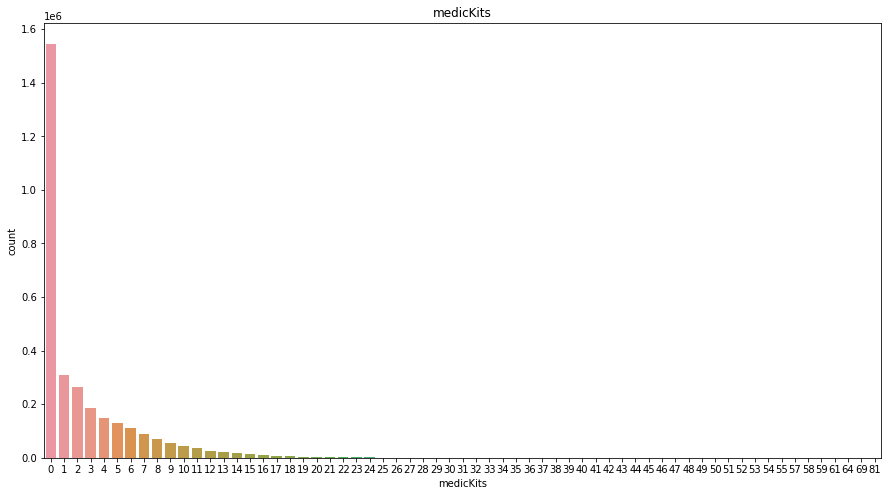

In [48]:
plt.subplots(figsize=(15,8))
sns.countplot(data=train,x=train['medicKits'])
plt.title('medicKits')
plt.show()

In [49]:
train.drop(train[train['medicKits']>=15].index,inplace=True)
train['medicKits'].value_counts()

0     1545567
1      307929
2      264620
3      187267
4      149523
5      129479
6      110137
7       90154
8       71930
9       55761
10      43954
11      34849
12      27228
13      20923
14      16166
Name: medicKits, dtype: int64

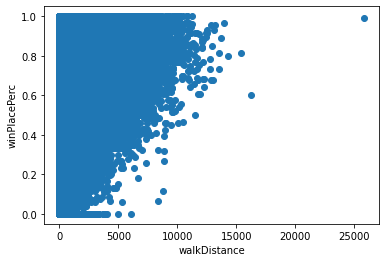

In [50]:
plt.xlabel("walkDistance")
plt.ylabel("winPlacePerc")
plt.scatter(train['walkDistance'],train['winPlacePerc'])

In [51]:
train.drop(train[train['walkDistance']>=9000].index,inplace=True)

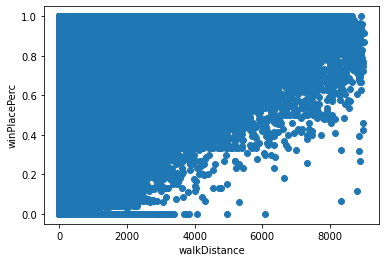

In [52]:
plt.xlabel("walkDistance")
plt.ylabel("winPlacePerc")
plt.scatter(train['walkDistance'],train['winPlacePerc'])

In [53]:
#adding new feature
train['otherDistances']=train['rideDistance']+train['swimDistance']
test['otherDistances']=test['rideDistance']+test['swimDistance']

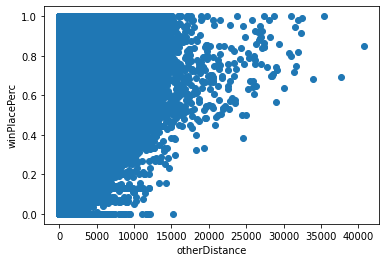

In [54]:
plt.xlabel("otherDistance")
plt.ylabel("winPlacePerc")
plt.scatter(train['otherDistances'],train['winPlacePerc'])

In [55]:
train.drop(train[train['otherDistances']>=18000].index,inplace=True)

In [56]:
# adding new feature
train['footSpeed'] = train['walkDistance']/train['matchDuration']
test['footSpeed']=test['walkDistance']/train['matchDuration']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='footSpeed', ylabel='Density'>

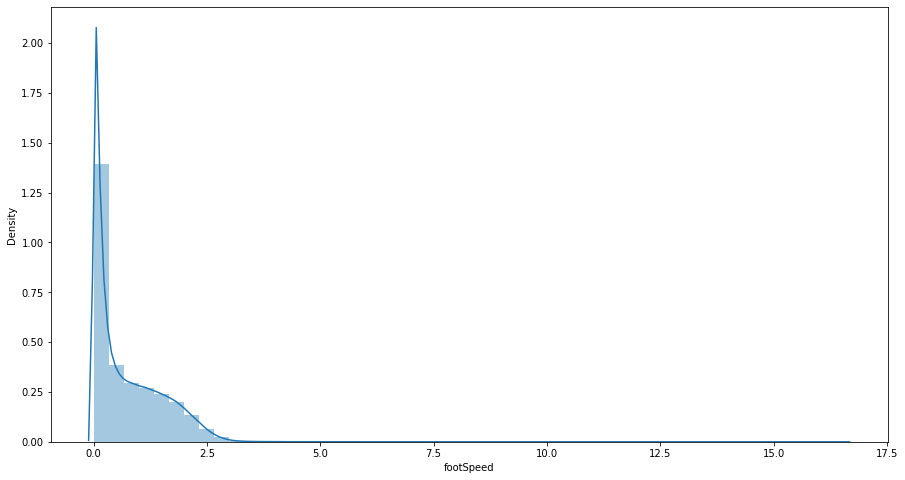

In [57]:
plt.figure(figsize=(15,8))
sns.distplot(train['footSpeed'])

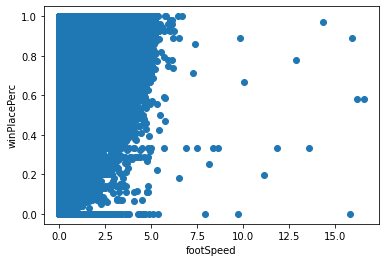

In [58]:
plt.xlabel("footSpeed")
plt.ylabel("winPlacePerc")
plt.scatter(train['footSpeed'],train['winPlacePerc'])

In [59]:
train.drop(train[train['footSpeed']>5].index,inplace=True)

In [60]:
# testing skill level of a player by checking their headshot kill rate
train['headshotRate'] = train['headshotKills']/train['kills']
test['headshotRate'] = test['headshotKills']/test['kills']

In [61]:
# filling nan values with zeros
train['headshotRate'] = train['headshotRate'].fillna(0)
test['headshotRate'] = test['headshotRate'].fillna(0)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


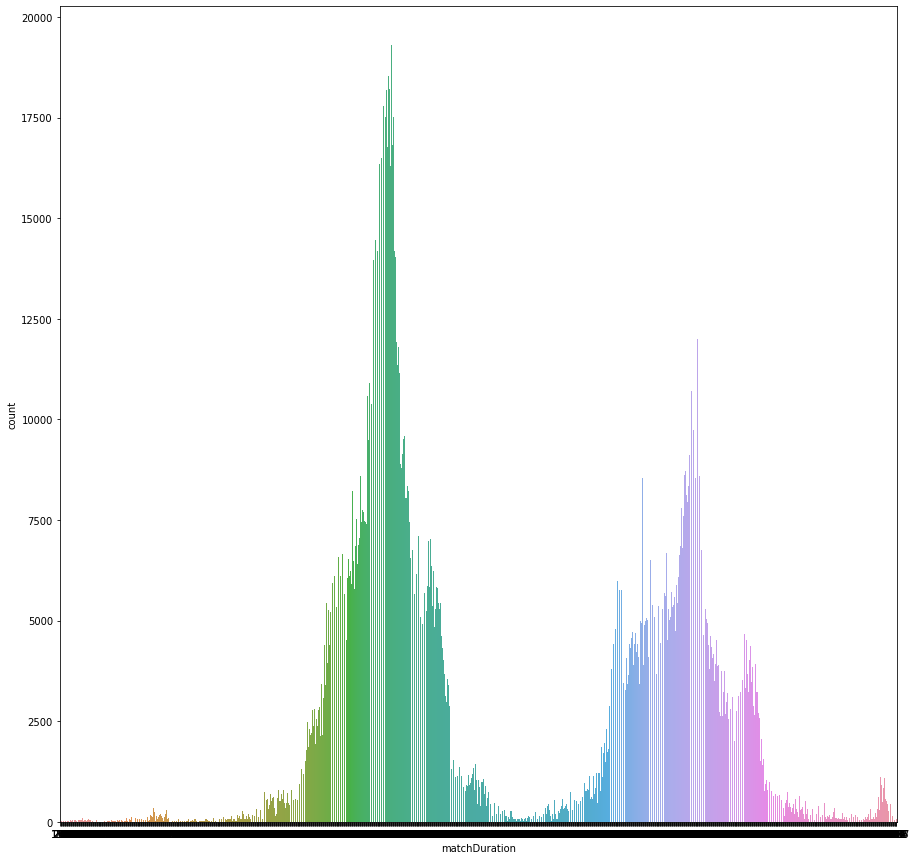

In [62]:
plt.figure(figsize=(15,15))
sns.countplot(train['matchDuration'].sort_values())
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

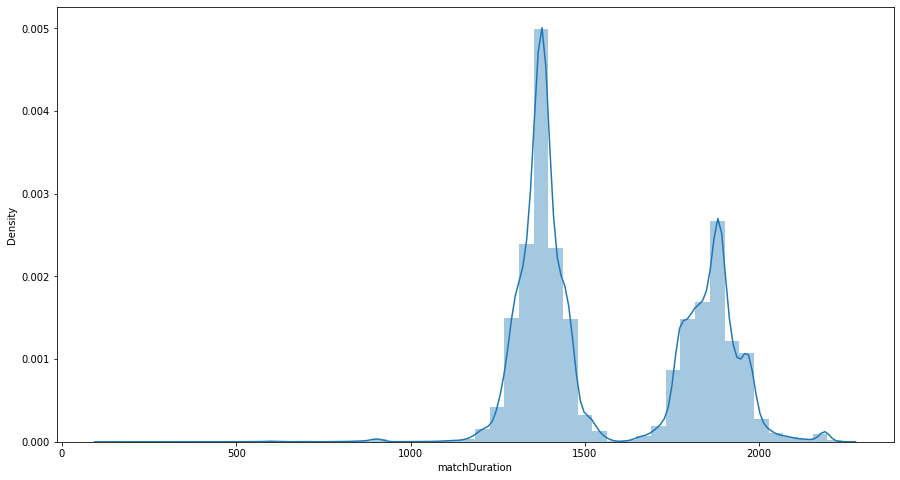

In [63]:
plt.figure(figsize=(15,8))
sns.distplot(train['matchDuration'])

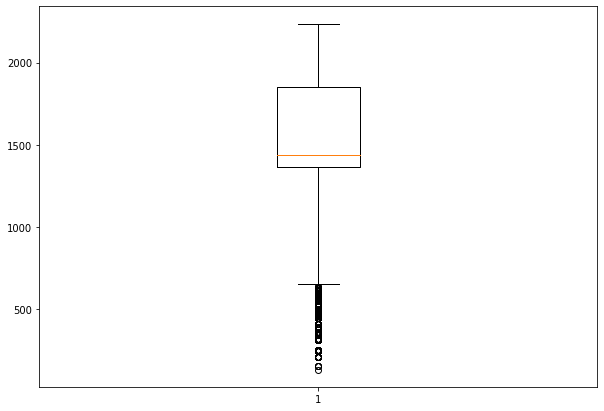

In [64]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(train['matchDuration'])
plt.show()

In [65]:
#Dropping the rows which got match duration less than 750
train.drop(train[train['matchDuration']<1000].index,inplace=True)

In [66]:
# adding new feature
train['players_in_match'] = train.groupby('matchId')['matchId'].transform('count')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


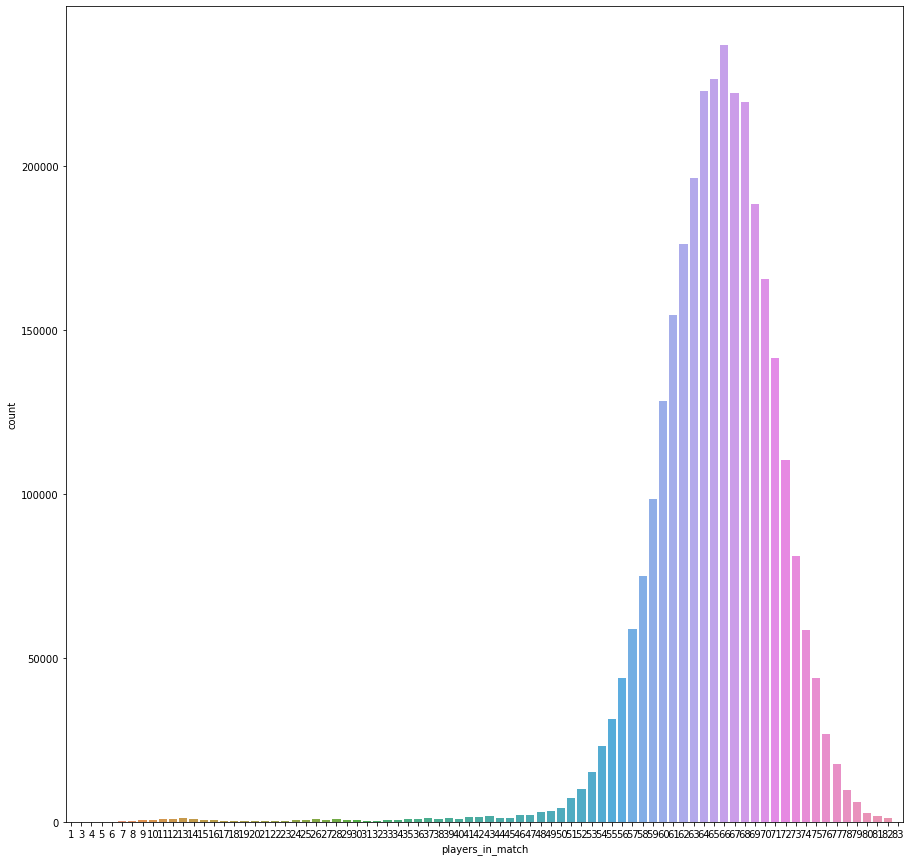

In [67]:
plt.figure(figsize=(15,15))
sns.countplot(train['players_in_match'].sort_values())
plt.show()

In [68]:
# Dropping the rows where number of players in that match are less than 50
train.drop(train[train['players_in_match']<50].index,inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


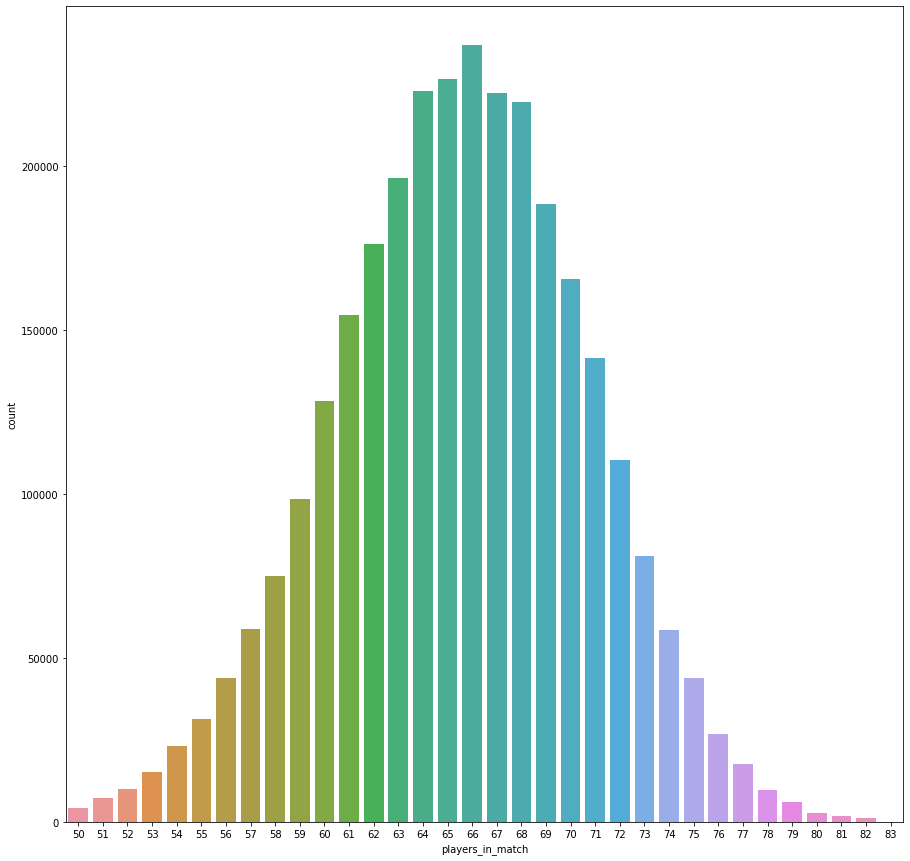

In [69]:
plt.figure(figsize=(15,15))
sns.countplot(train['players_in_match'].sort_values())
plt.show()

In [70]:
# adding new feature
train['totalDistances']=train['walkDistance']+train['otherDistances']
test['totalDistances']=test['walkDistance']+test['otherDistances']

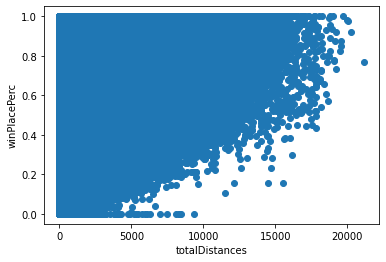

In [71]:
plt.xlabel("totalDistances")
plt.ylabel("winPlacePerc")
plt.scatter(train['totalDistances'],train['winPlacePerc'])

In [72]:
# removing outliers from total distances
train.drop(train[train['totalDistances']>18000].index,inplace=True)

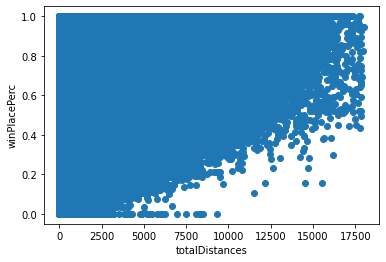

In [73]:
plt.xlabel("totalDistances")
plt.ylabel("winPlacePerc")
plt.scatter(train['totalDistances'],train['winPlacePerc'])

In [74]:
correlation = train.corr()
correlation['winPlacePerc'].sort_values(ascending=False)

winPlacePerc        1.000000
footSpeed           0.829867
walkDistance        0.815441
totalDistances      0.681080
boosts              0.634208
weaponsAcquired     0.617288
medicKits           0.605323
heals               0.445416
damageDealt         0.444816
kills               0.424803
longestKill         0.406824
killStreaks         0.369673
otherDistances      0.340665
rideDistance        0.337921
assists             0.298873
headshotKills       0.276675
DBNOs               0.274928
revives             0.235288
headshotRate        0.177365
swimDistance        0.150971
vehicleDestroys     0.069947
numGroups           0.039855
maxPlace            0.038621
roadKills           0.032157
teamKills           0.015088
rankPoints          0.013021
killPoints          0.012654
players_in_match    0.008416
winPoints           0.007303
matchDuration      -0.014012
killPlace          -0.722709
Name: winPlacePerc, dtype: float64

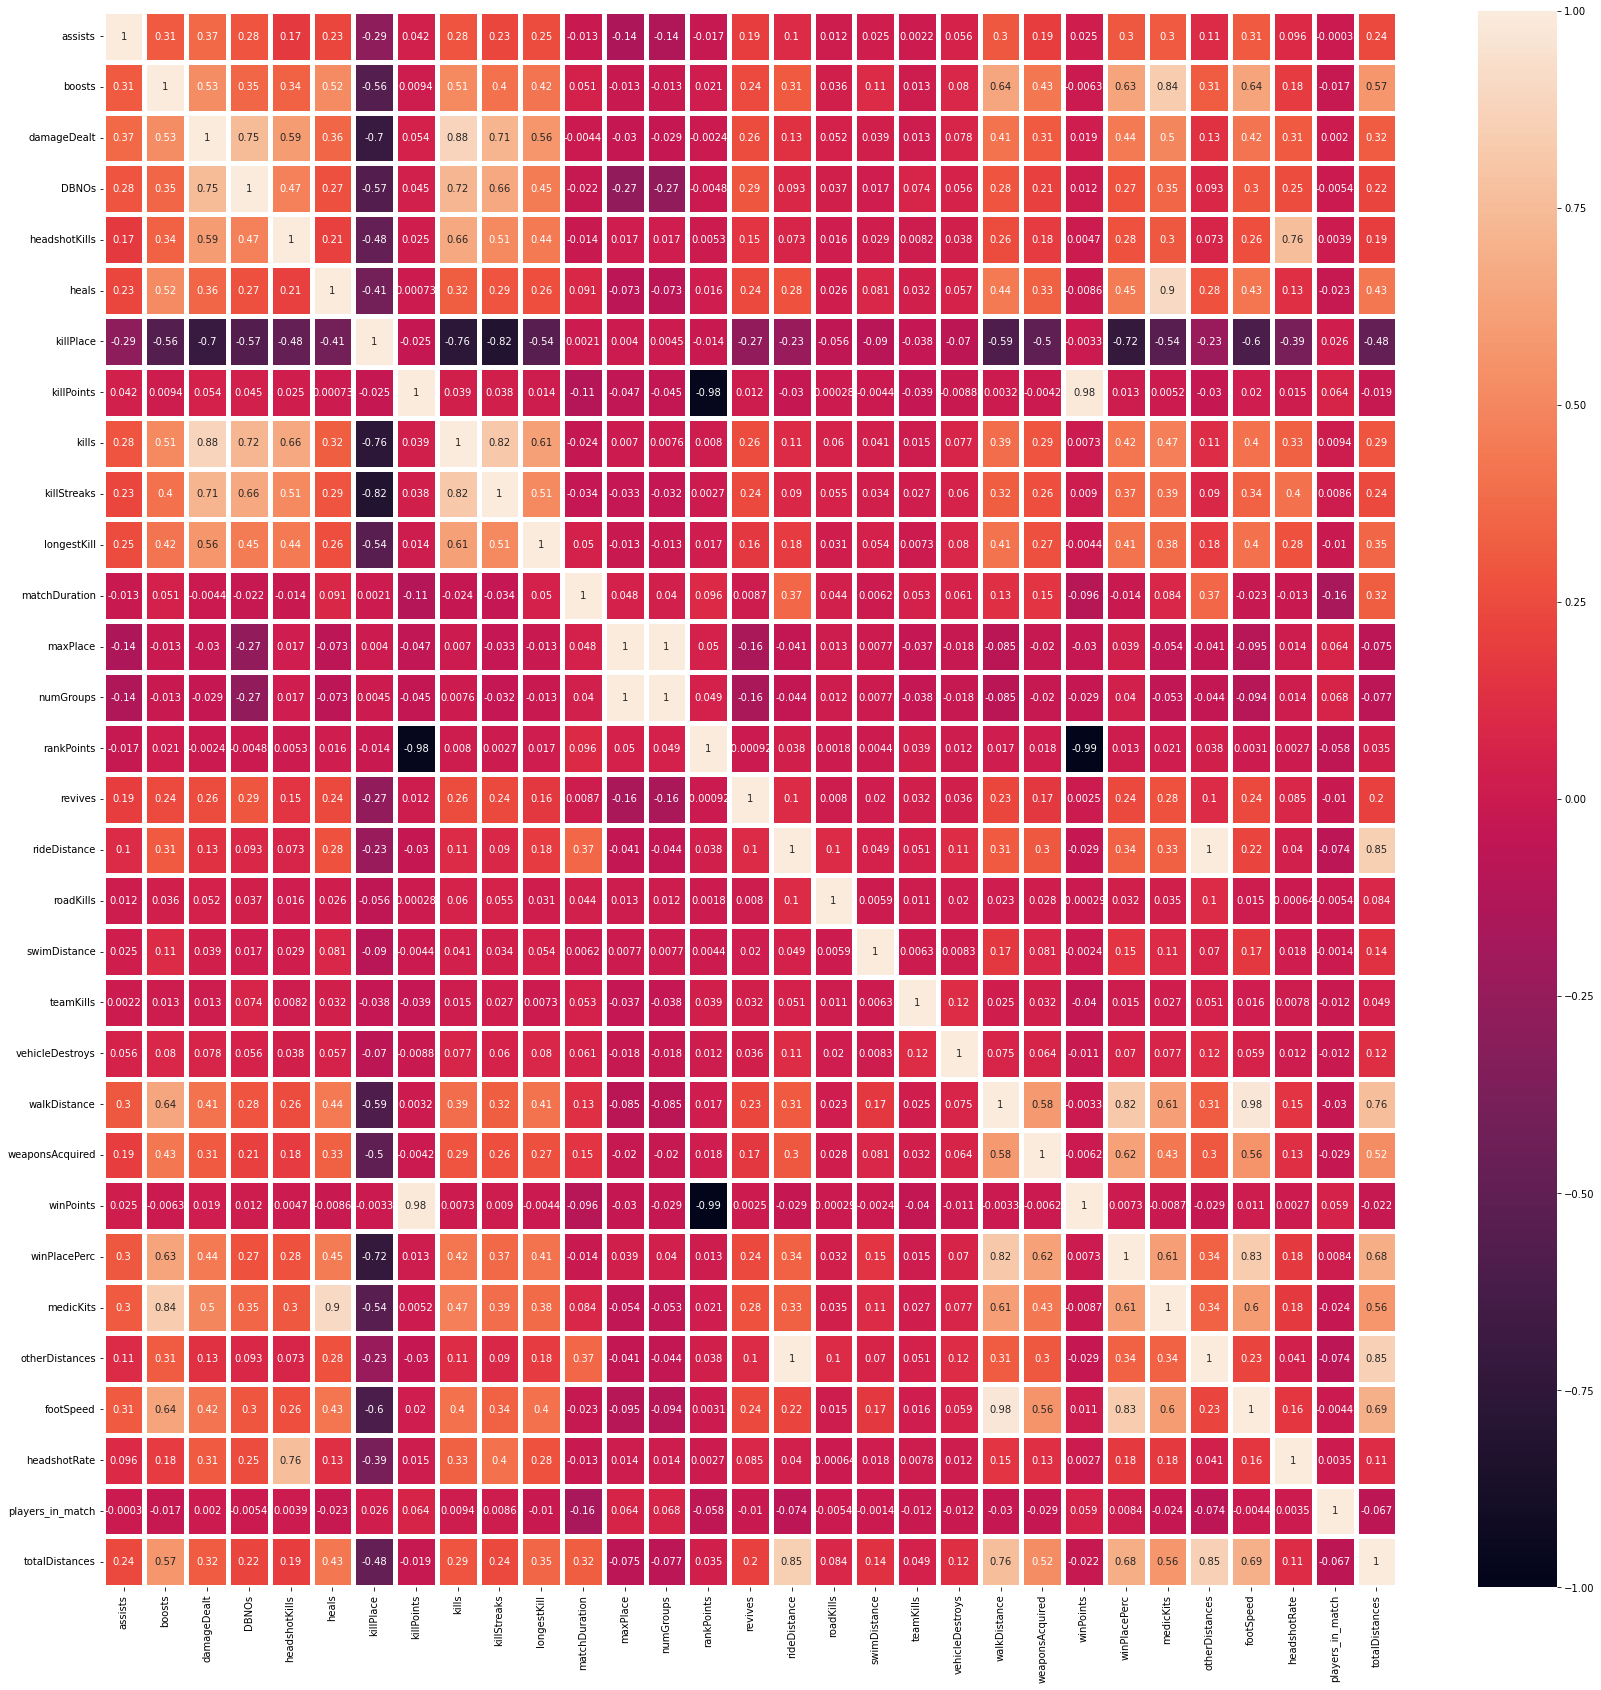

In [75]:
plt.figure(figsize=(29,29))
sns.heatmap(train.corr(),vmin=-1,linewidth=5, annot=True)
plt.show()

In [76]:
#checking outliers in weapons acquired
train['weaponsAcquired'].value_counts()

2      529434
3      525858
4      466158
1      401555
5      361623
        ...  
236         1
36          1
67          1
97          1
33          1
Name: weaponsAcquired, Length: 62, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weaponsAcquired', ylabel='Density'>

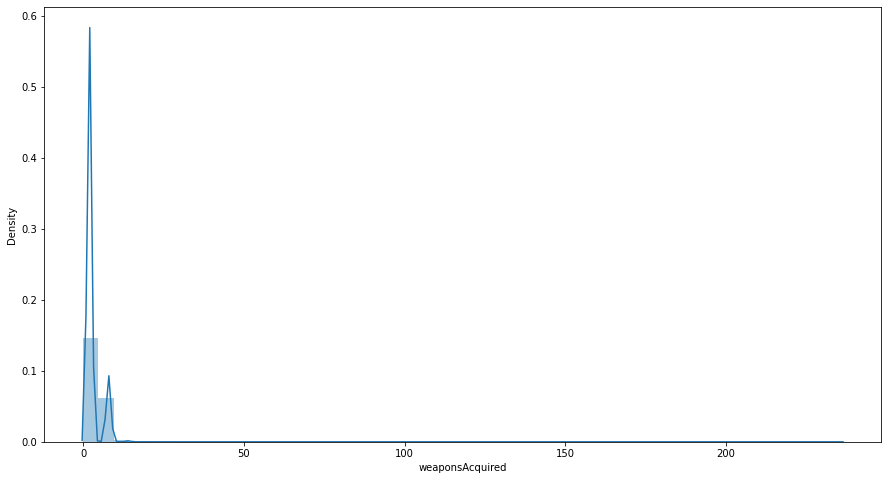

In [77]:
plt.figure(figsize=(15,8))
sns.distplot(train['weaponsAcquired'])

In [78]:
wa=train[train['weaponsAcquired']>=1]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

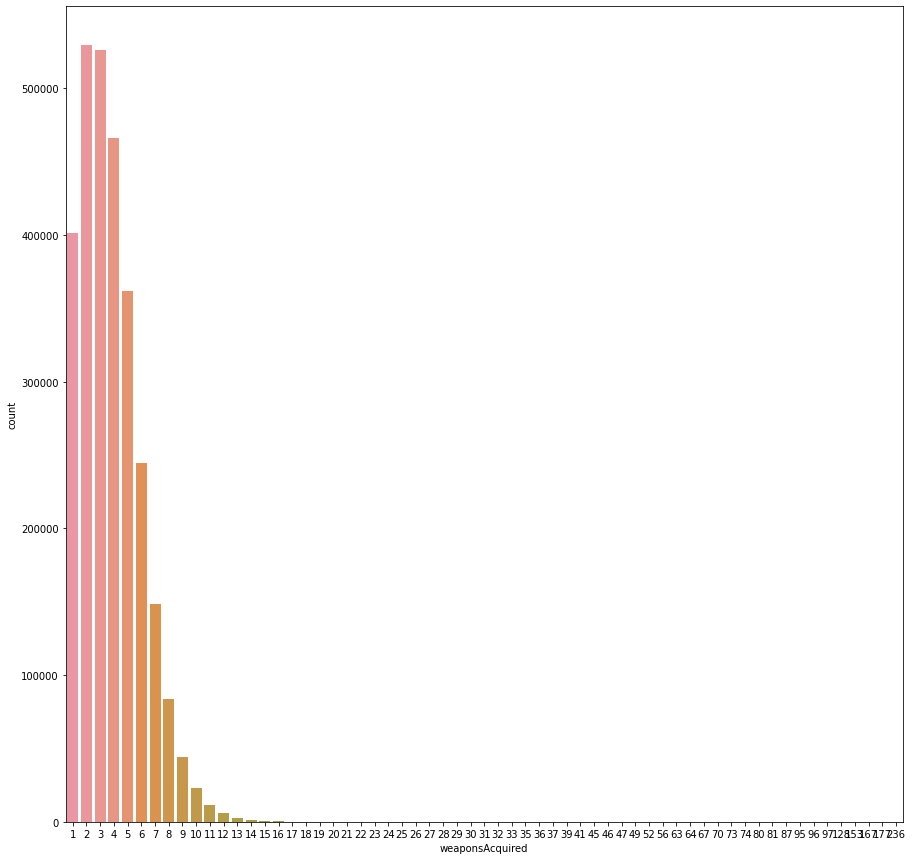

In [79]:
plt.figure(figsize=(15,15))
sns.countplot(wa['weaponsAcquired'])

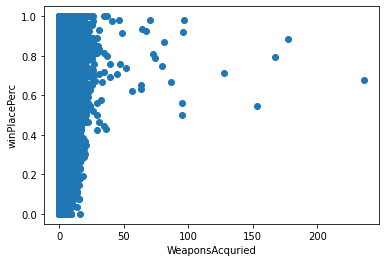

In [80]:
plt.xlabel("WeaponsAcquried")
plt.ylabel("winPlacePerc")
plt.scatter(train['weaponsAcquired'],train['winPlacePerc'])

In [81]:
train.drop(train[train['weaponsAcquired']>10].index,inplace=True)

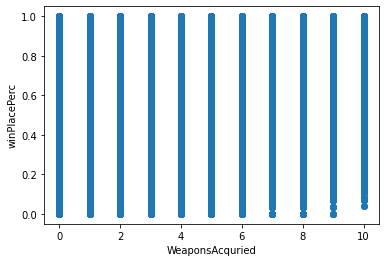

In [82]:
plt.xlabel("WeaponsAcquried")
plt.ylabel("winPlacePerc")
plt.scatter(train['weaponsAcquired'],train['winPlacePerc'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='killStreaks', ylabel='count'>

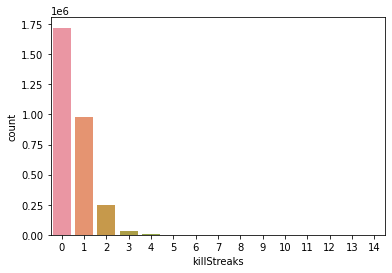

In [83]:
sns.countplot(train['killStreaks'])

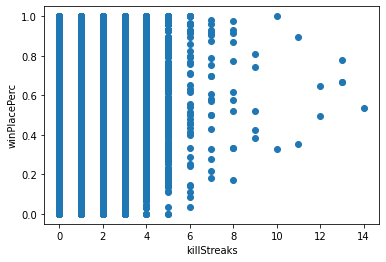

In [84]:
plt.xlabel("killStreaks")
plt.ylabel("winPlacePerc")
plt.scatter(train['killStreaks'],train['winPlacePerc'])

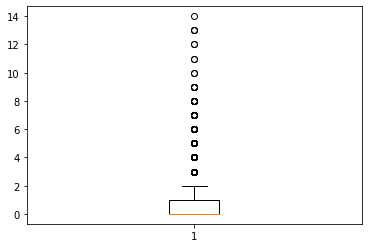

In [85]:
plt.boxplot(train['killStreaks'])
plt.show()

In [86]:
train.drop(train[train['killStreaks']>5].index,inplace=True)

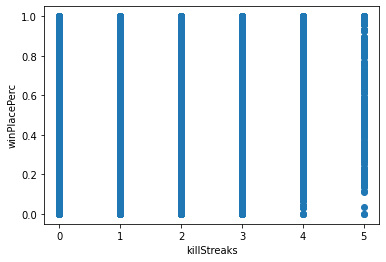

In [87]:
plt.xlabel("killStreaks")
plt.ylabel("winPlacePerc")
plt.scatter(train['killStreaks'],train['winPlacePerc'])

<AxesSubplot:>

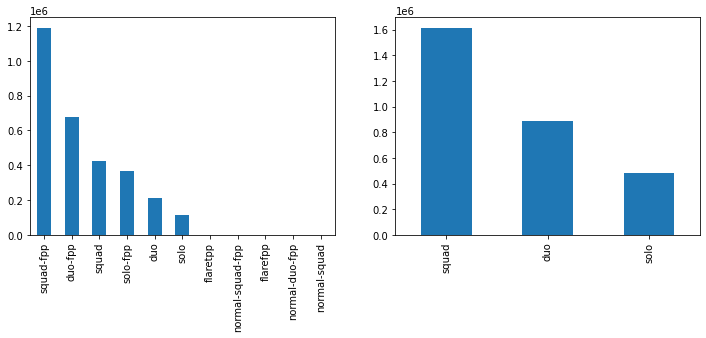

In [88]:
#Standardizing match type
#(squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp) to squad
#(duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp) to duo
#(solo,solo-fpp,normal-solo,normal-solo-fpp) to solo
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
train['matchType'].value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train["matchType"] = train['matchType'].apply(mapper)
train["matchType"].value_counts().plot.bar(ax=ax[1])

In [89]:
train["matchType"].value_counts()

squad    1615071
duo       887515
solo      481989
Name: matchType, dtype: int64

In [90]:
# Import label encoder
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
#Encode labels in column 'species'.
train['matchType']= label_encoder.fit_transform(train['matchType'])
  
train['matchType'].unique()

#squad=2
#duo=0
#solo=1

array([2, 0, 1])

<AxesSubplot:>

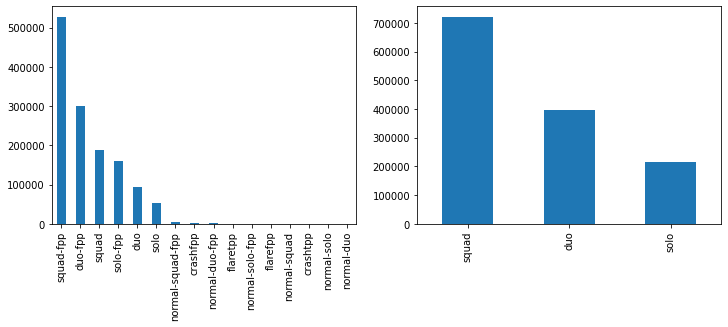

In [91]:
#Standardizing match type
#(squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp) to squad
#(duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp) to duo
#(solo,solo-fpp,normal-solo,normal-solo-fpp) to solo
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
test['matchType'].value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
test["matchType"] = test['matchType'].apply(mapper)
test["matchType"].value_counts().plot.bar(ax=ax[1])

In [92]:
# Import label encoder
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
#Encode labels in column 'species'.
test['matchType']= label_encoder.fit_transform(test['matchType'])
  
test['matchType'].unique()

#squad=2
#duo=0
#solo=1

array([2, 0, 1])

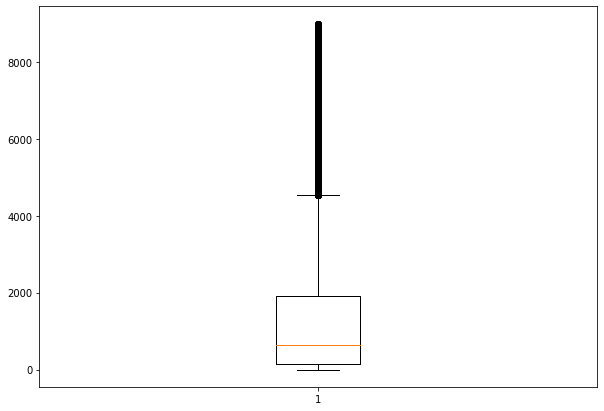

In [93]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(train['walkDistance'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalDistances', ylabel='Density'>

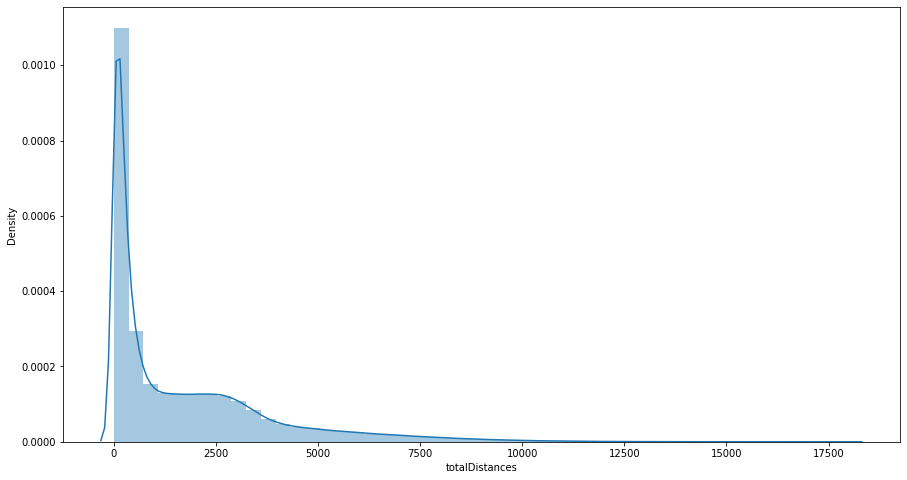

In [94]:
plt.figure(figsize=(15,8))
sns.distplot(train['totalDistances'])

In [95]:
train['totalDistances'].value_counts()[0]

61387

In [96]:
#creating a new feature to detect cheaters or finding players with no possibility of winning
train['kills_without_moving']=((train['kills']>0)&(train['totalDistances']==0))



In [97]:
#dropping the rows which got kills_without_moving as true
train.drop(train[train['kills_without_moving']==True].index,inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longestKill', ylabel='Density'>

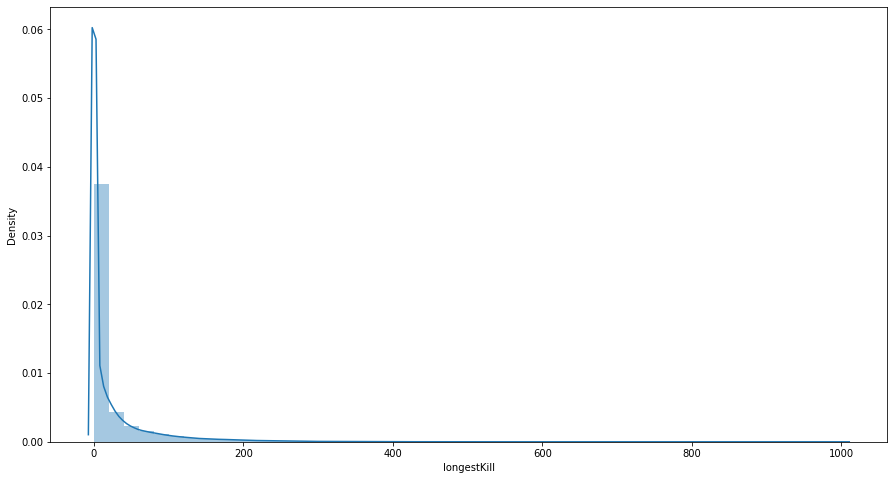

In [98]:
#very high long range kill indicates cheater or some players intentionally knocking some players and driving away that does not have any relation with winning
plt.figure(figsize=(15,8))
sns.distplot(train['longestKill'])

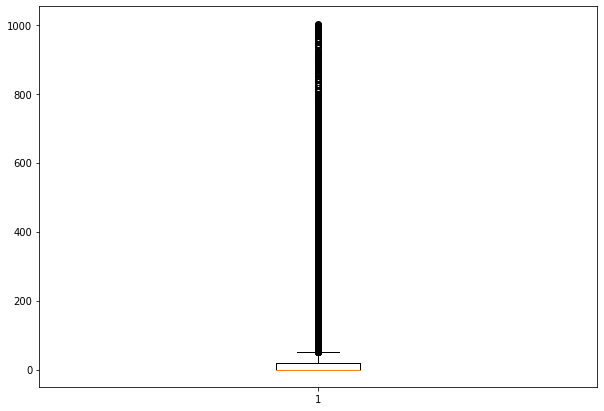

In [99]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(train['longestKill'])
plt.show()

In [100]:
#train['totalDistances'].value_counts()[>400]
train[train['longestKill']>700].count()

Id                      228
groupId                 228
matchId                 228
assists                 228
boosts                  228
damageDealt             228
DBNOs                   228
headshotKills           228
heals                   228
killPlace               228
killPoints              228
kills                   228
killStreaks             228
longestKill             228
matchDuration           228
matchType               228
maxPlace                228
numGroups               228
rankPoints              228
revives                 228
rideDistance            228
roadKills               228
swimDistance            228
teamKills               228
vehicleDestroys         228
walkDistance            228
weaponsAcquired         228
winPoints               228
winPlacePerc            228
medicKits               228
otherDistances          228
footSpeed               228
headshotRate            228
players_in_match        228
totalDistances          228
kills_without_moving

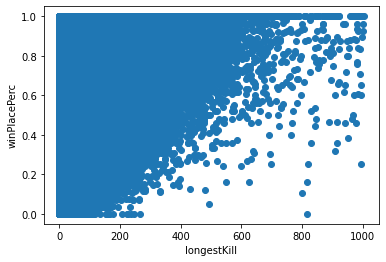

In [101]:
plt.xlabel("longestKill")
plt.ylabel("winPlacePerc")
plt.scatter(train['longestKill'],train['winPlacePerc'])

In [102]:
train['longestKill'].quantile(.9999)

659.8558099999558

In [103]:
train.drop(train[train['longestKill']>680].index,inplace=True)

In [104]:
#creating a new feature called damageDealtPerKill ,if its value is less then more winning probability
train['damageDealtPerKill'] = train['damageDealt']/train['kills']
test['damageDealtPerKill'] = test['damageDealt']/test['kills']

In [105]:
train['damageDealtPerKill'].describe()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    2141547.00
mean            inf
std             NaN
min            0.00
25%          100.00
50%          176.75
75%             NaN
max             inf
Name: damageDealtPerKill, dtype: float64

In [106]:
train['damageDealtPerKill'] = train['damageDealtPerKill'].fillna(130)
test['damageDealtPerKill'] = test['damageDealtPerKill'].fillna(130)

In [107]:
train['damageDealtPerKill'].describe()

count    2984163.0
mean           inf
std            NaN
min            0.0
25%          120.9
50%          130.0
75%            NaN
max            inf
Name: damageDealtPerKill, dtype: float64

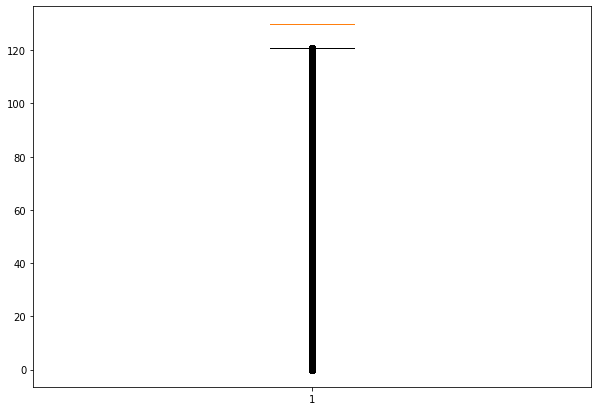

In [108]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(train['damageDealtPerKill'])
plt.show()

In [121]:
#Normalizing features considering the fact that there are 100 players in every match
train['normalizedKills'] = train['kills']*((100-train['players_in_match'])/100 + 1)
train['normalizedDamageDealt'] = train['damageDealt']*((100-train['players_in_match'])/100 + 1)
train['normalizedTeamHelping'] = train['teamHelping']*((100-train['players_in_match'])/100 + 1)
train['normalizedKillPlace'] = train['killPlace']*((100-train['players_in_match'])/100 + 1)
train['normalizedLongestKill'] = train['longestKill']*((100-train['players_in_match'])/100 + 1)
train['normalizedKillStreaks'] = train['killStreaks']*((100-train['players_in_match'])/100 + 1)
train['normalizedDBNOs'] = train['DBNOs']*((100-train['players_in_match'])/100 + 1)
train['normalizedVehicleDestroys'] = train['vehicleDestroys']*((100-train['players_in_match'])/100 + 1)

# Copying the same thing for the test
test['normalizedKills'] = test['kills']*((100-test['players_in_match'])/100 + 1)
test['normalizedDamageDealt'] = test['damageDealt']*((100-test['players_in_match'])/100 + 1)
test['normalizedTeamHelping'] = test['teamHelping']*((100-test['players_in_match'])/100 + 1)
test['normalizedKillPlace'] = test['killPlace']*((100-test['players_in_match'])/100 + 1)
test['normalizedLongestKill'] = test['longestKill']*((100-test['players_in_match'])/100 + 1)
test['normalizedKillStreaks'] = test['killStreaks']*((100-test['players_in_match'])/100 + 1)
test['normalizedDBNOs'] = test['DBNOs']*((100-test['players_in_match'])/100 + 1)
test['normalizedVehicleDestroys'] = test['vehicleDestroys']*((100-test['players_in_match'])/100 + 1)


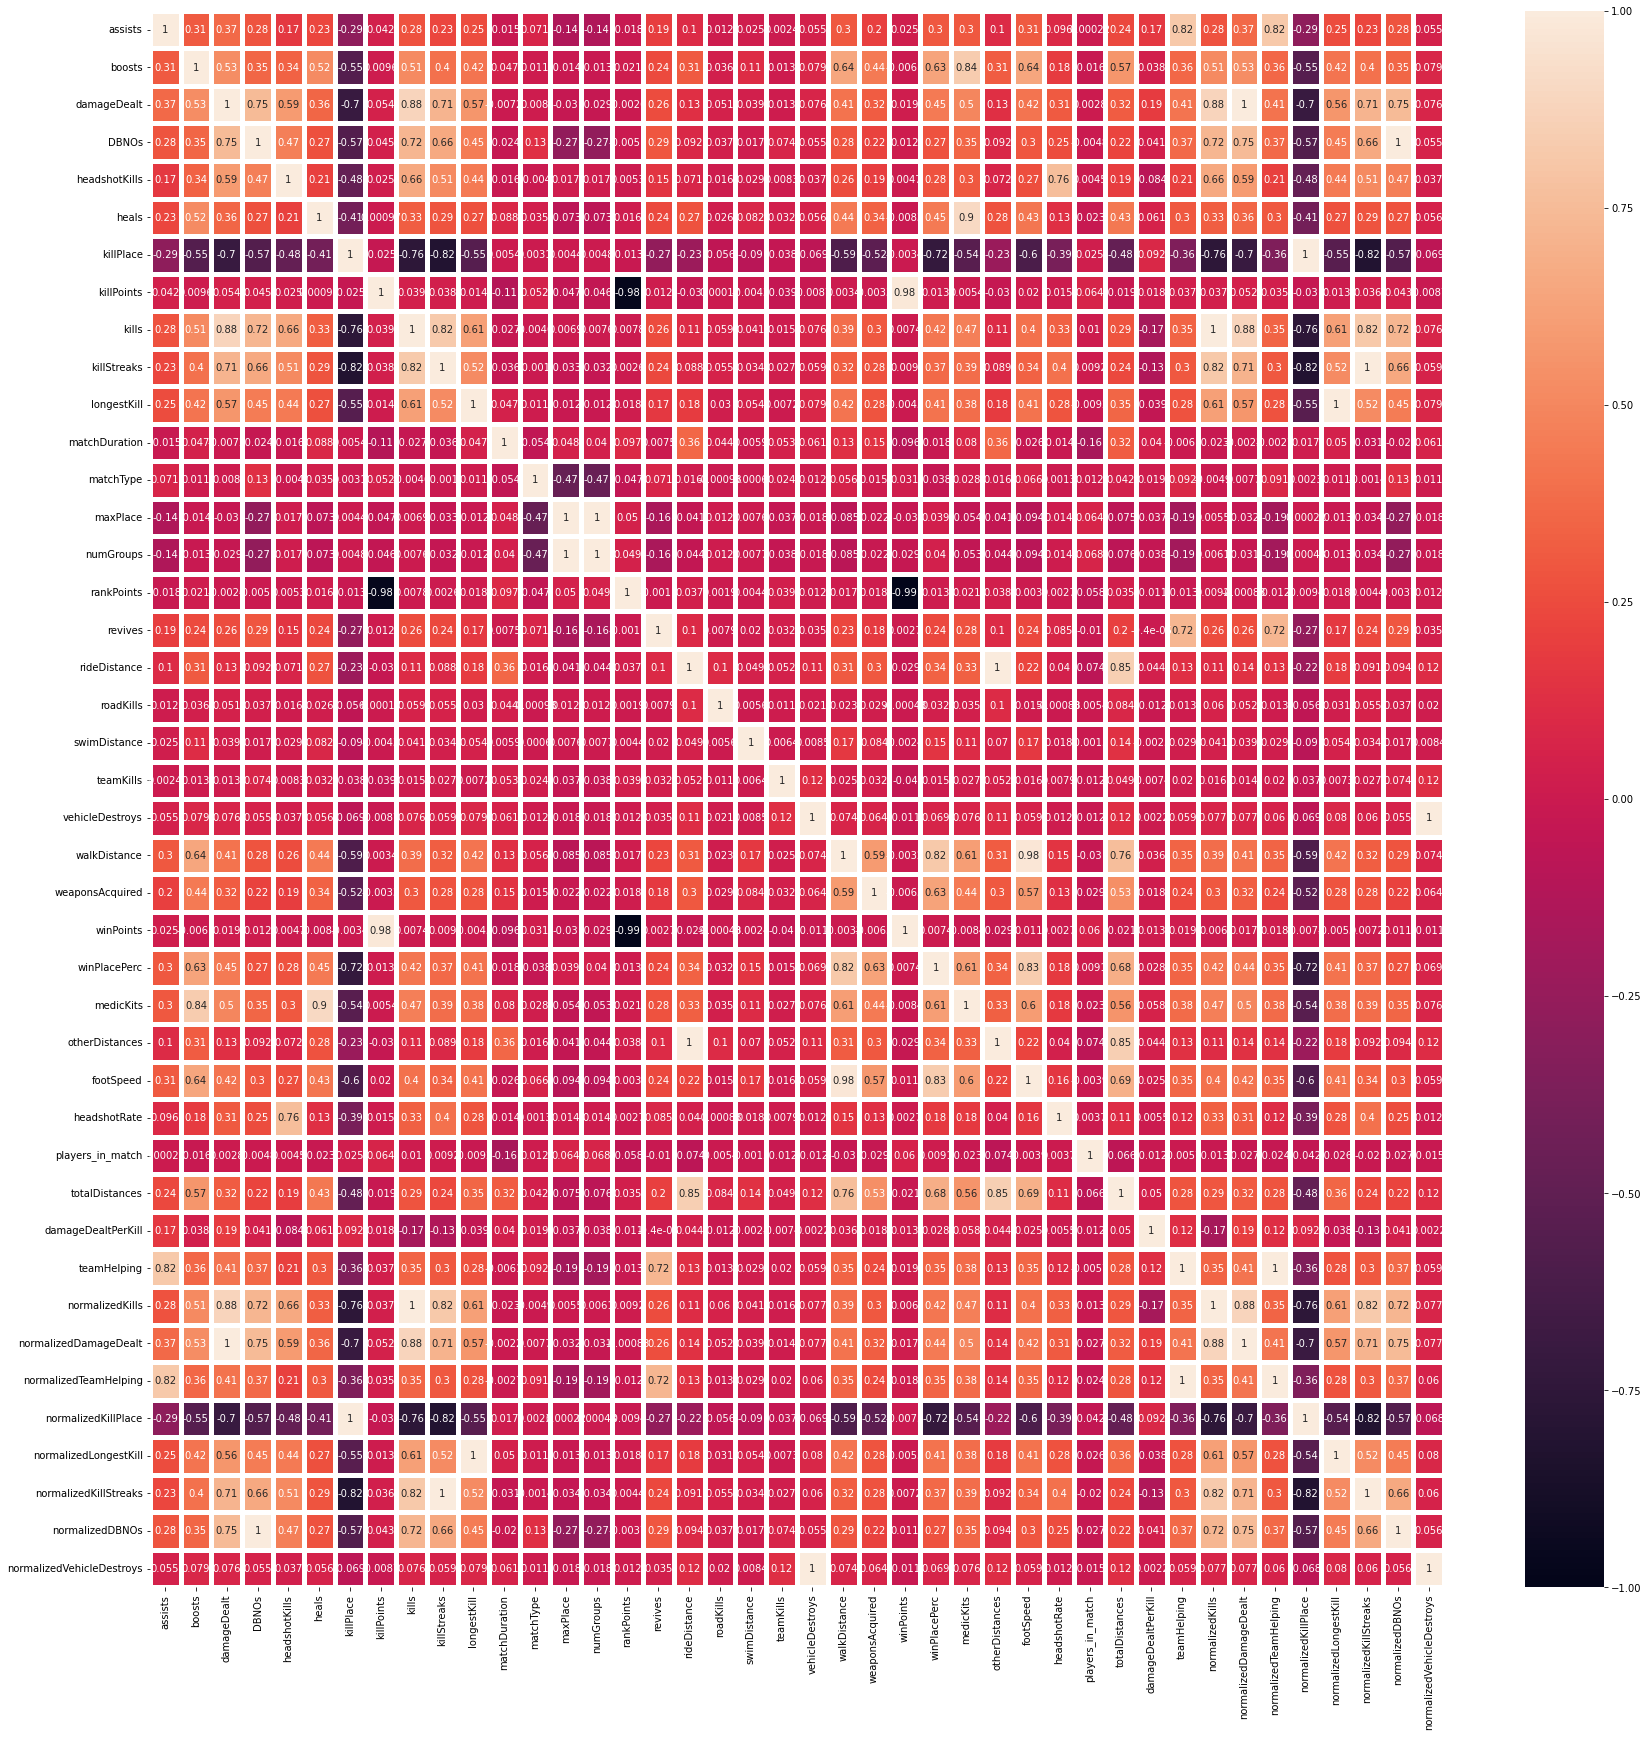

In [122]:
plt.figure(figsize=(29,29))
sns.heatmap(train.corr(),vmin=-1,linewidth=5, annot=True)
plt.show()

In [123]:
#dropping irrelavant columns for low corelation
train.drop(['winPoints', 'killPoints','rankPoints'], axis=1)
test.drop(['winPoints', 'killPoints','rankPoints'], axis=1)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamHelping,players_in_match,normalizedKills,normalizedDamageDealt,normalizedTeamHelping,normalizedKillPlace,normalizedLongestKill,normalizedKillStreaks,normalizedDBNOs,normalizedVehicleDestroys
0,a5e44e9ccbd861,d59db3787770f1,673b10e9fb9569,0,0,0.00,0,0,0,84,...,0,25,0.00,0.0000,0.00,147.00,0.00000,0.00,0.00,0.00
1,ec09f9f5c29d75,fa6c32fa872ffb,f4962a6445499b,4,4,637.20,2,1,1,6,...,5,29,5.13,1089.6120,8.55,10.26,433.65600,1.71,3.42,0.00
2,fe603d927d7792,96a01db6216403,f6c6ca38bd0452,0,0,0.00,0,0,0,74,...,0,29,0.00,0.0000,0.00,126.54,0.00000,0.00,0.00,0.00
3,f7aa0b9da441b1,18f0ea9d617675,0ef5e1ef794417,0,8,830.80,5,0,1,1,...,0,25,15.75,1453.9000,0.00,1.75,643.47500,3.50,8.75,0.00
4,bcd3f9cb689f6c,6d0a87eb28a92f,42abdc80c2f13b,0,0,0.00,0,0,0,75,...,1,28,0.00,0.0000,1.72,129.00,0.00000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334085,a5d56fce88779e,b63c75d3b40e59,5999dbd4fc727d,0,0,0.00,0,0,0,35,...,0,27,1.73,0.0000,0.00,60.55,13.18087,1.73,0.00,0.00
1334086,e092641b74415c,6565b9275d7330,25a357c5a13568,0,0,0.00,0,0,0,78,...,0,24,0.00,0.0000,0.00,137.28,0.00000,0.00,0.00,0.00
1334087,c0787295da8fb1,8261fa7723d5a0,47b1fb484b8146,1,3,61.59,0,0,3,20,...,1,18,1.82,112.0938,1.82,36.40,115.06040,1.82,0.00,3.64
1334088,43924a843c11bd,b55958bb0b0741,b8db5a96c526e1,0,0,0.00,0,0,0,68,...,0,27,0.00,0.0000,0.00,117.64,0.00000,0.00,0.00,0.00


In [125]:
train['teamHelping'] = train['assists']+train['revives']
test['teamHelping'] = test['assists']+test['revives']

In [126]:
test['players_in_match'] = test.groupby('matchId')['matchId'].transform('count')

In [ ]:
train.drop(['kills_without_moving'], axis=1, inplace=True)

In [128]:
cor=train.corr()
cor['winPlacePerc'].sort_values(ascending=False)

winPlacePerc                 1.000000
footSpeed                    0.829667
walkDistance                 0.815150
totalDistances               0.680457
boosts                       0.634191
weaponsAcquired              0.632555
medicKits                    0.605019
heals                        0.445251
damageDealt                  0.445199
normalizedDamageDealt        0.444358
kills                        0.424891
normalizedKills              0.424360
longestKill                  0.410190
normalizedLongestKill        0.408958
killStreaks                  0.369806
normalizedKillStreaks        0.369179
teamHelping                  0.348351
normalizedTeamHelping        0.347894
otherDistances               0.339277
rideDistance                 0.336520
assists                      0.298502
headshotKills                0.276848
DBNOs                        0.274893
normalizedDBNOs              0.274517
revives                      0.235252
headshotRate                 0.177079
swimDistance

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334090 entries, 0 to 1334089
Data columns (total 45 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Id                         1334090 non-null  object 
 1   groupId                    1334090 non-null  object 
 2   matchId                    1334090 non-null  object 
 3   assists                    1334090 non-null  int64  
 4   boosts                     1334090 non-null  int64  
 5   damageDealt                1334090 non-null  float64
 6   DBNOs                      1334090 non-null  int64  
 7   headshotKills              1334090 non-null  int64  
 8   heals                      1334090 non-null  int64  
 9   killPlace                  1334090 non-null  int64  
 10  killPoints                 1334090 non-null  int64  
 11  kills                      1334090 non-null  int64  
 12  killStreaks                1334090 non-null  int64  
 13  longestKill 

In [130]:
y = train['winPlacePerc']

X= train[['footSpeed','totalDistances','medicKits','weaponsAcquired', 'damageDealt',  'kills', 'longestKill', 'killStreaks', 'DBNOs','headshotKills', 'teamHelping','killPlace','matchDuration','matchType']]

In [131]:
X_pred= test[['footSpeed','totalDistances','medicKits','weaponsAcquired', 'damageDealt',  'kills', 'longestKill', 'killStreaks', 'DBNOs','headshotKills', 'teamHelping','killPlace','matchDuration','matchType']]
X_pred

,footSpeed,totalDistances,medicKits,weaponsAcquired,damageDealt,kills,longestKill,killStreaks,DBNOs,headshotKills,teamHelping,killPlace,matchDuration,matchType
0,0.009183,11.920,0,0,0.00,0,0.000,0,0,0,0,84,1894,2
1,1.853187,3553.755,5,3,637.20,3,253.600,1,2,1,5,6,1299,2
2,0.421903,558.600,0,2,0.00,0,0.000,0,0,0,0,74,1954,2
3,2.476978,3443.000,9,6,830.80,9,367.700,2,5,0,0,1,1901,0
4,0.055242,107.500,0,1,0.00,0,0.000,0,0,0,1,75,1330,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334085,0.154864,291.300,0,2,0.00,1,7.619,1,0,0,0,35,1835,0
1334086,0.140558,196.500,0,3,0.00,0,0.000,0,0,0,0,78,1777,2
1334087,1.044025,7654.000,6,4,61.59,1,63.220,1,0,0,1,20,2060,2
1334088,0.074084,107.200,0,3,0.00,0,0.000,0,0,0,0,68,1382,0


In [132]:
X_pred.isna().sum()
X_pred['footSpeed'] = X_pred['footSpeed'].fillna(0)
X_pred.isna().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


footSpeed          0
totalDistances     0
medicKits          0
weaponsAcquired    0
damageDealt        0
kills              0
longestKill        0
killStreaks        0
DBNOs              0
headshotKills      0
teamHelping        0
killPlace          0
matchDuration      0
matchType          0
dtype: int64

In [133]:
X.to_csv(f"final1_trainX.csv")
y.to_csv(f"fianl2_trainy.csv")
X_pred.to_csv(f"final3_test.csv")